In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('hospital_mortality.csv')

In [3]:
df = df.drop(columns=['Unnamed: 83'])

In [4]:
df.isna().any()

encounter_id                   False
patient_id                     False
hospital_id                    False
age                             True
bmi                             True
                               ...  
lymphoma                        True
solid_tumor_with_metastasis     True
apache_3j_bodysystem            True
apache_2_bodysystem             True
hospital_death                 False
Length: 84, dtype: bool

In [5]:
df[df['d1_potassium_max'].isnull()].head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
2,119783,50777,118,25.0,31.9500,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
12,76356,41311,118,48.0,NaN,0,Caucasian,M,175.3,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
20,79115,88295,83,79.0,28.3761,1,Caucasian,F,170.2,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Neurological,Neurologic,0
50,31959,741,149,75.0,NaN,0,Caucasian,M,177.8,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Gastrointestinal,Gastrointestinal,0


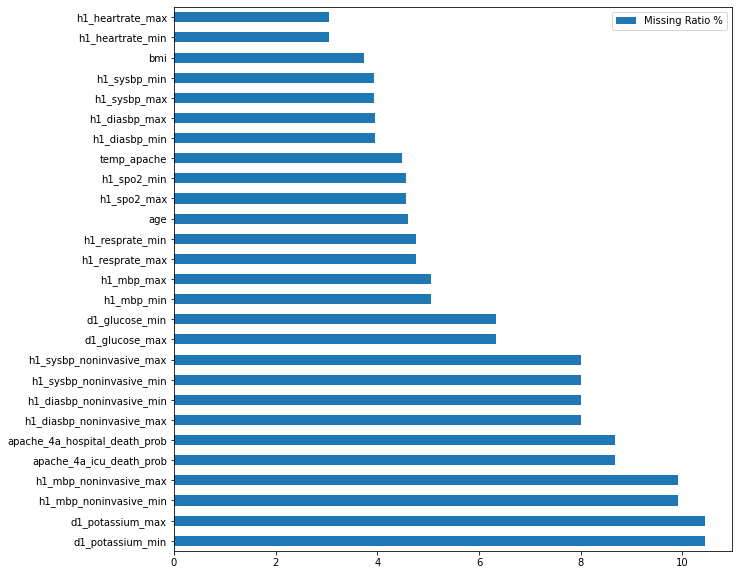

In [48]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        na_df = na_df.drop(na_df[na_df < 3].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plot_width, plot_height = (10,10)
        plt.rcParams['figure.figsize'] = (plot_width,plot_height)
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [44]:
df_new = df[['hospital_id', 'icu_admit_source', 'd1_potassium_min']]

In [8]:
df_new

,hospital_id,icu_admit_source,d1_potassium_min
0,118,Floor,3.4
1,81,Floor,3.8
2,118,Accident & Emergency,NaN
3,118,Operating Room / Recovery,3.5
4,33,Accident & Emergency,NaN
...,...,...,...
91708,30,Floor,4.2
91709,121,Floor,3.8
91710,195,Accident & Emergency,3.2
91711,66,Accident & Emergency,NaN


In [9]:
df_new[df_new['d1_potassium_min'].isnull()].hospital_id.unique()

array([118,  33,  83, 149,  46,  77,  31, 151,  69,  81, 113,  63, 168,
       137, 140, 102,  89, 150,  34, 124,  68, 198, 129,   4,  91, 138,
       174, 169,  57, 177, 134,  85,  78,  95, 155, 105, 116,  98,   5,
        76, 128,  79,  32,  44, 112, 136,  55, 161, 147,  23, 179,  88,
       119, 171,  17,  72, 130, 204,  10, 109, 117, 202,  70,  62,  16,
       199,  54, 160, 107,  87,  20, 100, 132,  14, 186,  53,  21, 182,
        99,  71,  24, 189,  60, 200,  26, 133, 194, 111,  27,   8, 176,
        90,  80, 187, 101,  39, 192,  43,  19, 145,  94,  40,  50, 180,
         9, 159, 166, 125,  37, 135, 185,  92,  64, 157,  51, 139,  13,
       158,  47, 103, 196,  18, 197, 181,  38,   2, 188,  15,  49,  35,
       146, 142, 167,  29,  36,   6, 121,  30, 183, 195, 104,  66, 184])

In [10]:
df_new[df_new['d1_potassium_min'].isnull()].icu_admit_source.unique()

array(['Accident & Emergency', 'Operating Room / Recovery', 'Floor',
       'Other ICU', 'Other Hospital', nan], dtype=object)

In [11]:
df_new1 = df[['hospital_id', 'icu_admit_source', 'h1_mbp_noninvasive_min']]

In [12]:
df_new1

,hospital_id,icu_admit_source,h1_mbp_noninvasive_min
0,118,Floor,85.0
1,81,Floor,57.0
2,118,Accident & Emergency,83.0
3,118,Operating Room / Recovery,NaN
4,33,Accident & Emergency,92.0
...,...,...,...
91708,30,Floor,55.0
91709,121,Floor,68.0
91710,195,Accident & Emergency,NaN
91711,66,Accident & Emergency,NaN


In [13]:
df_new1[df_new1['h1_mbp_noninvasive_min'].isnull()].hospital_id.unique()

array([118,  83, 149,  31,  77,  46,  33,  81,  69, 151,  63, 113,  89,
       137, 168,  34,  91, 198, 129, 102, 140, 124, 150,  68,  74,   4,
       138, 169, 174,  78,  85,  57, 134, 155, 177,  95,  76,   5, 116,
       105,  98, 171, 161, 128, 147, 112,  55, 136,  23,  32, 179,  17,
        79,  44, 119,  88, 204, 109,  10, 202, 117,  70,  16, 199,  62,
        54, 160, 186, 107, 100,  14,  53,  87, 132,  20,  21,  99,  71,
       182,  24,  60, 200,  84, 189, 133,  26, 194,  27,   8, 111, 176,
        39, 187,  80, 101,  90,  19,  43, 192, 145,  40, 180,   9,  94,
        50,  93, 125,  64, 185, 135, 139, 157,  37,  92,  13, 159,  51,
       166, 196,  47, 103,  18, 197,  38, 181, 158, 142, 188,  35,   2,
        49, 146,  15,  36,  29, 167,  30, 121, 104, 195, 183,   6,   3,
       184,  66])

In [14]:
df_new1[df_new1['h1_mbp_noninvasive_min'].isnull()].icu_admit_source.unique()

array(['Operating Room / Recovery', 'Accident & Emergency', 'Floor',
       'Other Hospital', 'Other ICU', nan], dtype=object)

In [15]:
df.icu_admit_source.unique()

array(['Floor', 'Accident & Emergency', 'Operating Room / Recovery',
       'Other Hospital', 'Other ICU', nan], dtype=object)

In [16]:
df[df['icu_admit_source'].isnull()]

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
962,129078,63301,149,64.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
1892,110482,81289,33,46.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
3930,25575,33900,149,61.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
4092,32443,90248,149,76.0,27.038943,0,Caucasian,F,152.4,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
6148,73020,50940,46,22.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81299,116011,48170,196,49.0,40.588227,1,Caucasian,F,163.8,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,0
85316,125273,96629,35,77.0,28.577911,1,Caucasian,M,182.9,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses,0
90287,102243,83186,36,69.0,29.371047,0,Caucasian,M,172.7,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
90368,55213,72890,167,37.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0


In [17]:
df[df['icu_admit_source'].isnull()].hospital_id.unique()

array([149,  33,  46,  69,  83, 118,  77, 137,  89, 168, 140, 174, 169,
       138,  98, 105, 116,  79, 161,  55, 147, 128, 202, 204,  10, 109,
       117,  70,  16, 199,  54,  62, 160, 100, 107, 200,  60, 133,  27,
       111, 176,  50, 180, 145,  94,  19, 192,  40,  18, 103,  47, 196,
       158,  35,  36, 167,   6])

In [18]:
df[df['icu_admit_source'].isnull()]

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
962,129078,63301,149,64.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
1892,110482,81289,33,46.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
3930,25575,33900,149,61.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
4092,32443,90248,149,76.0,27.038943,0,Caucasian,F,152.4,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
6148,73020,50940,46,22.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81299,116011,48170,196,49.0,40.588227,1,Caucasian,F,163.8,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,0
85316,125273,96629,35,77.0,28.577911,1,Caucasian,M,182.9,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses,0
90287,102243,83186,36,69.0,29.371047,0,Caucasian,M,172.7,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
90368,55213,72890,167,37.0,NaN,0,Caucasian,M,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0


In [19]:
df[df['height'].isnull()].hospital_id.unique()

array([ 83, 118,  46,  81, 149,  33,  77,  69,  63, 113,  31,  89, 102,
        91, 124, 140,  68, 198, 137,  34,  57, 134, 169, 138, 174,  95,
        78,  85, 177, 155,  98, 105, 116,  76,   5, 161,  55,  79, 119,
        32, 128, 147, 171, 136, 112,  44, 179, 204, 109,  10, 117,  70,
        62, 199,  54,  16, 107,  14, 186, 100,  87,  53,  21, 182,  99,
        24,  60, 200, 133,  26, 194, 111,  27,  39, 187, 176,  50,  19,
       145,  43, 192,  94,  40, 180,   9,  64, 159, 139, 125, 166, 185,
       135, 157,  92,  51, 103,  18,  47, 196, 181, 158, 188, 146,  35,
       142,   2,  49, 167,  29,  36,   3,  30, 104, 195, 184,   6])

In [20]:
df[df['apache_2_diagnosis'].isnull()]

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
44,71147,52594,118,60.0,35.452865,1,Caucasian,M,170.20,Operating Room / Recovery,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
83,63576,36677,118,56.0,24.542930,1,Hispanic,M,172.70,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
136,127089,25073,118,64.0,35.951557,1,Caucasian,M,170.00,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
218,11448,96257,83,61.0,20.874598,1,Caucasian,F,165.10,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
255,41803,6742,118,57.0,31.567232,1,Caucasian,M,182.90,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91597,22339,90132,183,NaN,30.470522,0,Caucasian,F,168.00,Floor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
91625,49553,18923,6,NaN,21.947625,0,Caucasian,F,157.48,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
91689,47573,27439,6,NaN,24.445450,0,Caucasian,M,188.00,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
91693,57002,57515,183,NaN,18.526701,0,Caucasian,M,178.00,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [21]:
corrM = df.corr()

In [22]:
corrM

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
encounter_id,1.000000,-0.009575,-0.004532,-0.003990,-0.001068,0.002036,-0.005400,-0.000992,-0.000570,-0.004376,...,0.000344,0.001907,0.007601,0.003402,-0.000972,-0.001707,-0.002172,-0.001176,-0.004646,-0.005243
patient_id,-0.009575,1.000000,-0.007075,0.006343,-0.001380,0.001387,0.002902,-0.001770,-0.004412,0.000275,...,0.001625,-0.002426,0.001307,0.000434,-0.001667,0.000548,0.000844,0.002333,-0.003065,0.004877
hospital_id,-0.004532,-0.007075,1.000000,-0.008673,0.012874,0.052123,0.027895,0.004526,-0.001285,0.026314,...,-0.000283,-0.004947,0.002962,0.011978,0.001362,0.000146,-0.002992,0.002588,-0.004730,-0.001255
age,-0.003990,0.006343,-0.008673,1.000000,-0.087077,0.067320,-0.109937,-0.024257,0.049872,-0.127252,...,0.076275,-0.029477,-0.028065,0.077908,-0.020061,0.025007,0.030310,0.023335,0.025924,0.111017
bmi,-0.001068,-0.001380,0.012874,-0.087077,1.000000,0.015921,-0.056316,0.001403,-0.001531,0.877339,...,-0.013796,-0.020434,-0.002377,0.172943,-0.001855,-0.031144,-0.013375,-0.010017,-0.043380,-0.031247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
immunosuppression,-0.001707,0.000548,0.000146,0.025007,-0.031144,-0.014695,0.000530,-0.031111,0.032695,-0.029642,...,0.026268,0.025781,-0.002971,-0.002502,0.003084,1.000000,0.134934,0.103201,0.269653,0.043973
leukemia,-0.002172,0.000844,-0.002992,0.030310,-0.013375,-0.017587,0.001718,0.001014,0.041853,-0.012755,...,0.031966,-0.002471,-0.005373,0.002890,-0.001567,0.134934,1.000000,0.031380,0.006210,0.029788
lymphoma,-0.001176,0.002333,0.002588,0.023335,-0.010017,-0.008215,0.008370,-0.002336,0.013954,-0.005197,...,0.011287,0.021529,0.001516,-0.002326,0.001689,0.103201,0.031380,1.000000,0.014749,0.018722
solid_tumor_with_metastasis,-0.004646,-0.003065,-0.004730,0.025924,-0.043380,0.015369,0.004921,-0.014381,0.036581,-0.039255,...,0.028090,-0.001611,-0.005890,-0.013122,0.007240,0.269653,0.006210,0.014749,1.000000,0.051105


In [23]:
corrM['hospital_death']

encounter_id                  -0.005243
patient_id                     0.004877
hospital_id                   -0.001255
age                            0.111017
bmi                           -0.031247
                                 ...   
immunosuppression              0.043973
leukemia                       0.029788
lymphoma                       0.018722
solid_tumor_with_metastasis    0.051105
hospital_death                 1.000000
Name: hospital_death, Length: 77, dtype: float64

In [24]:
corrM.sort_values(by=['hospital_death']).tail(10)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
age,-0.003990,0.006343,-0.008673,1.000000,-0.087077,0.067320,-0.109937,-0.024257,0.049872,-0.127252,...,0.076275,-0.029477,-0.028065,0.077908,-0.020061,0.025007,0.030310,0.023335,0.025924,0.111017
d1_potassium_max,-0.001755,0.000674,0.010070,0.061185,0.087240,0.098103,0.053411,-0.009723,0.030315,0.104413,...,0.099186,0.001143,0.019026,0.097990,0.016702,-0.001993,0.005920,0.002215,-0.001841,0.112465
h1_heartrate_max,-0.000167,0.000688,-0.015428,-0.164788,-0.015905,-0.113025,-0.011921,0.000062,0.056704,-0.021803,...,0.111928,0.010839,0.017471,-0.010911,0.020562,0.063718,0.022851,0.018565,0.043911,0.113603
h1_resprate_max,0.002682,0.004802,-0.032078,0.028071,0.005343,-0.192096,-0.036836,-0.011490,0.027938,-0.010327,...,0.107010,0.013438,0.004128,0.001445,0.004098,0.047945,0.024748,0.019895,0.024167,0.121933
d1_heartrate_max,-0.003891,0.001330,-0.012901,-0.135417,-0.030567,-0.073569,-0.020743,0.002855,0.060808,-0.038491,...,0.148973,0.010895,0.014094,-0.022435,0.016226,0.062603,0.023641,0.020198,0.044415,0.162934
intubated_apache,-0.003172,0.001303,0.027670,0.015396,0.037714,0.160831,0.019906,-0.075458,0.051842,0.043666,...,0.275508,0.006503,0.005196,0.002140,0.001694,-0.008275,-0.003382,-0.004237,-0.011866,0.173139
ventilated_apache,-0.005775,-0.004433,0.030761,0.041296,0.071014,0.146526,0.007192,0.003087,0.086566,0.069173,...,0.284239,0.005283,-0.002289,0.010740,-0.005178,-0.002724,-0.002082,-0.003462,-0.016280,0.228661
apache_4a_icu_death_prob,0.000344,0.001625,-0.000283,0.076275,-0.013796,-0.061250,-0.011588,-0.002002,0.037219,-0.018303,...,1.000000,0.007713,0.035895,0.012126,0.026941,0.026268,0.031966,0.011287,0.028090,0.283913
apache_4a_hospital_death_prob,-0.000513,0.003735,-0.006993,0.143167,-0.033546,-0.098412,-0.029071,0.006706,0.058722,-0.043706,...,0.878988,0.010402,0.040282,0.014114,0.024115,0.038922,0.044126,0.018303,0.048300,0.311043
hospital_death,-0.005243,0.004877,-0.001255,0.111017,-0.031247,-0.093574,-0.019526,0.000994,0.063316,-0.038362,...,0.283913,0.004403,0.039453,-0.015784,0.038864,0.043973,0.029788,0.018722,0.051105,1.000000


In [25]:
corrM.sort_values(by=['hospital_death']).head(10)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
gcs_motor_apache,0.007664,0.002216,-0.020512,0.025843,0.021091,0.015783,-0.013907,-0.023557,-0.014105,0.013837,...,-0.428237,-0.003627,-0.007556,0.022560,-0.005705,0.017957,0.005132,0.005408,0.014312,-0.282449
gcs_eyes_apache,0.003276,0.001551,-0.011727,0.026363,0.012927,0.009830,-0.008601,-0.025385,-0.024837,0.008699,...,-0.388813,-0.003121,-0.015335,0.023153,-0.013279,0.018719,0.001230,0.008648,0.012608,-0.260373
gcs_verbal_apache,0.006516,0.000471,-0.002954,-0.017829,0.028515,-0.013365,0.009360,-0.033426,-0.045830,0.030524,...,-0.363716,-0.002584,-0.011563,0.018425,-0.009501,0.022844,0.008095,0.007984,0.015394,-0.241044
d1_sysbp_min,-0.002455,-0.006877,0.014535,-0.060160,0.052352,0.029359,0.048863,-0.021858,-0.045931,0.071931,...,-0.181044,0.001972,-0.042179,0.024136,-0.044671,-0.033663,-0.021674,-0.016623,-0.022142,-0.210170
d1_spo2_min,0.000512,-0.002318,0.011384,-0.084488,-0.024743,0.036399,0.008570,-0.007415,-0.024452,-0.020837,...,-0.134496,0.003664,-0.004327,0.002829,-0.008266,-0.017636,-0.017838,-0.009755,-0.010799,-0.210100
d1_sysbp_noninvasive_min,-0.002115,-0.007695,0.015300,-0.060322,0.053080,0.034684,0.050273,-0.023556,-0.045438,0.073318,...,-0.181870,0.001881,-0.042248,0.024723,-0.044744,-0.034035,-0.021868,-0.016917,-0.022510,-0.209926
d1_temp_min,0.003035,0.003264,-0.039445,-0.070002,0.035808,-0.033104,0.005733,-0.001865,-0.002172,0.036138,...,-0.240512,-0.002631,-0.020446,-0.004584,-0.025062,0.000834,-0.002466,-0.001971,-0.002059,-0.207239
d1_mbp_noninvasive_min,-0.000472,-0.003740,0.018439,-0.130206,0.015640,0.022284,0.095100,-0.040063,-0.046501,0.057039,...,-0.169564,0.009354,-0.045883,-0.019015,-0.050417,-0.023497,-0.022929,-0.013603,-0.010721,-0.195475
d1_mbp_min,-0.000553,-0.003249,0.016304,-0.131755,0.015275,0.012453,0.093622,-0.038684,-0.046880,0.055879,...,-0.167628,0.009433,-0.045124,-0.020257,-0.050345,-0.022492,-0.022983,-0.013356,-0.010156,-0.195262
d1_diasbp_noninvasive_min,0.001202,-0.004605,0.022370,-0.209291,-0.007641,0.017472,0.137583,-0.041253,-0.042488,0.053515,...,-0.156391,0.012969,-0.041736,-0.052145,-0.046699,-0.014344,-0.025261,-0.011553,-0.002947,-0.179786
